# Projet : Calcul de l'indice de qualité de l'eau avec Python

## Objectif
Ce projet vise à résoudre un problème réel de science des données en calculant l'indice de qualité de l'eau (Water Quality Index - WQI) à l'aide de Python. Il inclut des visualisations détaillées et une analyse approfondie des données pour évaluer la qualité de l'eau en fonction de divers paramètres.

## Structure du Projet
1. Introduction
2. Chargement et Prétraitement des Données
3. Analyse Exploratoire des Données (EDA)
4. Calcul de l'Indice de Qualité de l'Eau (WQI)
5. Visualisation des Résultats
6. Conclusion

In [29]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement et Prétraitement des Données

In [23]:
# Chargement des données
file_path = 'Water quality.xlsx'
water_quality_df = pd.read_excel(file_path)

# Affichage des premières lignes des données
water_quality_df.head()

,LAT_DEG,LONG_DEG,UNION,WELL_DEPTH,HCO3,Ca,Cl,F,Fe,K,Mg,Na,NO3,pH,SO4,Mn,AsIII
0,23.6147,89.8553,Faridpur Paurashava,24.4,471,127.0,27.6,0.20,0.447,4.5,27.8,22.5,0.2,6.84,13.5,1.470,7
1,23.6075,89.8633,Faridpur Paurashava,27.4,580,142.0,9.3,0.40,4.240,3.9,29.6,25.0,0.2,7.17,0.2,1.130,990
2,23.6031,89.8272,Ambikapur,36.6,529,116.0,33.9,0.20,9.600,3.9,32.5,19.0,0.2,6.99,8.2,1.130,27
3,23.6064,89.8444,Faridpur Paurashava,18.9,568,116.0,16.5,0.10,0.944,6.2,30.6,30.9,0.2,6.82,3.9,0.999,4
4,23.5689,89.8536,Aliabad,45.7,561,88.4,13.5,0.24,7.680,5.0,40.0,36.6,4.7,6.82,0.5,0.080,4


In [24]:
# Prétraitement des données
# Remplacer les valeurs manquantes par la moyenne des colonnes correspondantes pour les colonnes numériques uniquement
numeric_columns = water_quality_df.select_dtypes(include=[np.number]).columns
water_quality_df[numeric_columns] = water_quality_df[numeric_columns].fillna(water_quality_df[numeric_columns].mean())

# Vérification des valeurs manquantes
print(water_quality_df.isnull().sum())

LAT_DEG       0
LONG_DEG      0
UNION         0
WELL_DEPTH    0
HCO3          0
Ca            0
Cl            0
F             0
Fe            0
K             0
Mg            0
Na            0
NO3           0
pH            0
SO4           0
Mn            0
AsIII         0
dtype: int64


## Analyse Exploratoire des Données (EDA)

In [25]:
# Statistiques descriptives
water_quality_df.describe()

,LAT_DEG,LONG_DEG,WELL_DEPTH,HCO3,Ca,Cl,F,Fe,K,Mg,Na,NO3,pH,SO4,Mn,AsIII
count,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,23.591833,89.815016,46.229687,541.812500,103.72500,24.675000,0.121875,5.642125,4.965625,32.680000,36.435938,0.453125,6.905781,4.307812,0.656109,47.484375
std,0.046104,0.048968,43.011585,127.345658,35.51816,36.600963,0.060968,4.923974,1.364891,10.096984,39.570714,0.952019,0.186086,10.939259,0.721039,128.138813
min,23.495800,89.697500,13.700000,200.000000,34.80000,1.800000,0.020000,0.052000,2.600000,8.920000,5.100000,0.200000,6.380000,0.100000,0.041000,4.000000
25%,23.563475,89.785750,24.400000,476.250000,78.27500,4.650000,0.087500,0.866000,3.975000,25.900000,13.800000,0.200000,6.817500,0.100000,0.135250,4.000000
50%,23.586250,89.816250,32.000000,554.500000,101.00000,10.450000,0.120000,5.550000,4.750000,32.100000,21.100000,0.200000,6.935000,0.300000,0.389000,5.000000
75%,23.616850,89.846575,49.775000,612.500000,123.25000,17.925000,0.150000,8.500000,5.725000,39.700000,37.200000,0.200000,7.010000,2.100000,0.985750,46.750000
max,23.696400,89.902500,213.400000,848.000000,190.00000,195.000000,0.400000,19.600000,8.600000,59.500000,175.000000,4.900000,7.350000,63.500000,4.230000,990.000000


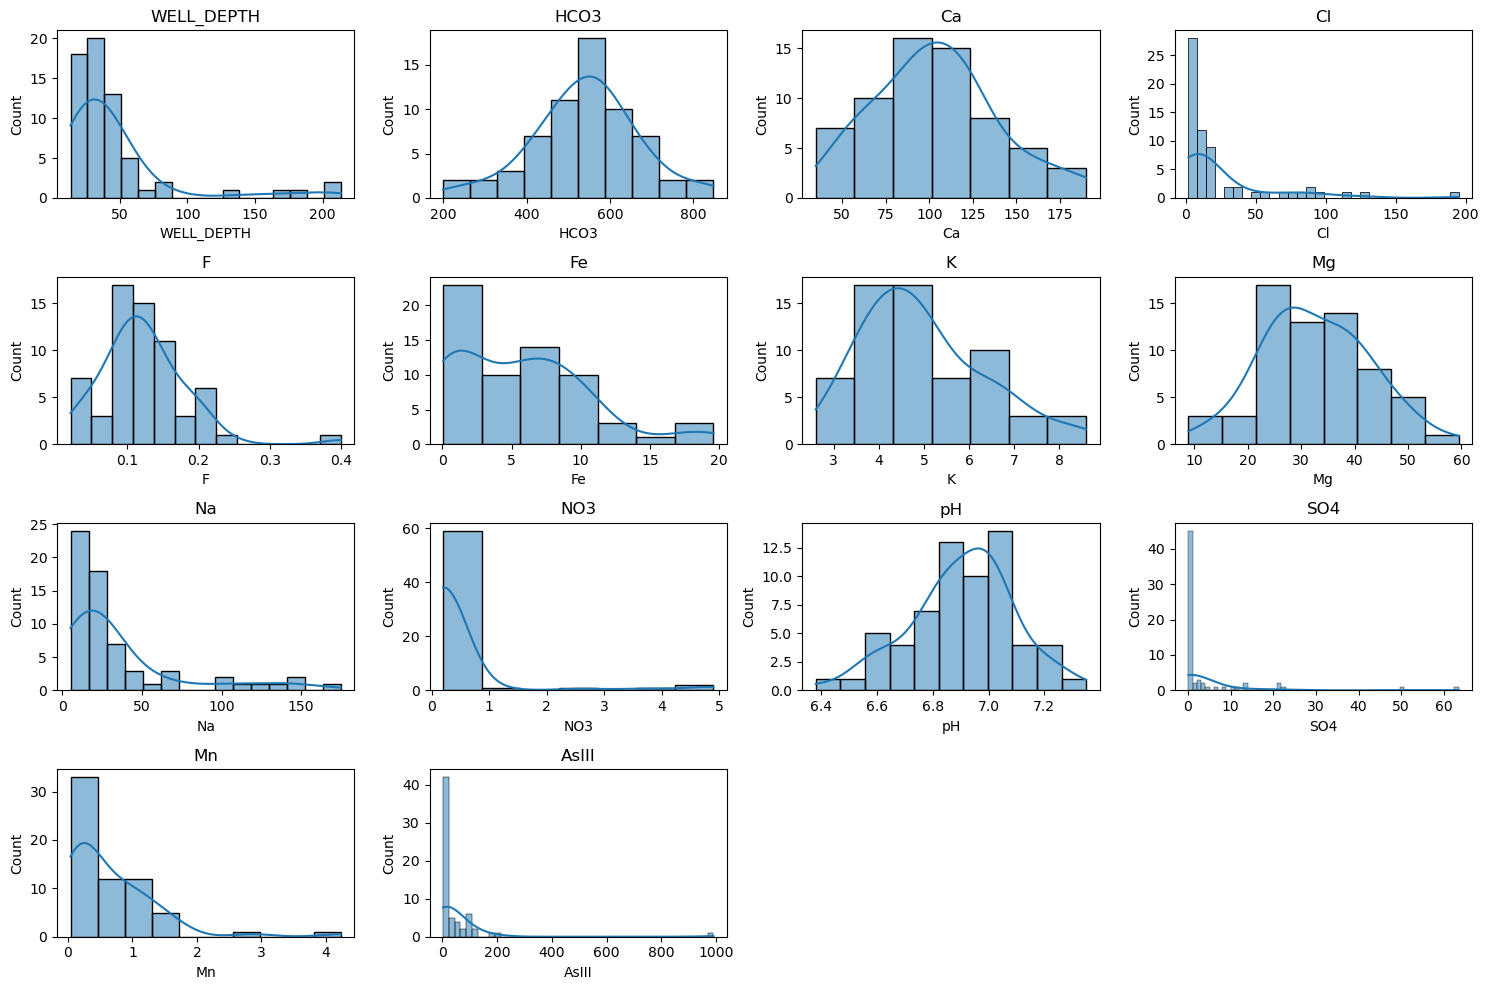

In [26]:
# Visualisation des distributions de chaque paramètre
plt.figure(figsize=(15, 10))
for i, column in enumerate(water_quality_df.columns[3:], 1):
    plt.subplot(4, 4, i)
    sns.histplot(water_quality_df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

## Calcul de l'Indice de Qualité de l'Eau (WQI)

In [34]:
# Définition des poids pour chaque paramètre
weights = {
    'pH': 0.15, 'HCO3': 0.10, 'Ca': 0.10, 'Cl': 0.10,
    'F': 0.10, 'Fe': 0.10, 'K': 0.05, 'Mg': 0.10,
    'Na': 0.10, 'NO3': 0.05, 'SO4': 0.05, 'Mn': 0.10, 'AsIII': 0.10
}

# Calcul de l'indice de qualité de l'eau (WQI)
def calculate_wqi(df, weights):
    # Calcul des sous-indices
    sub_indices = {}
    for param, weight in weights.items():
        sub_indices[param] = df[param] * weight
    
    # Calcul du WQI global
    df['WQI'] = sum(sub_indices.values())
    return df

water_quality_df = calculate_wqi(water_quality_df, weights)

## Visualisation des Résultats

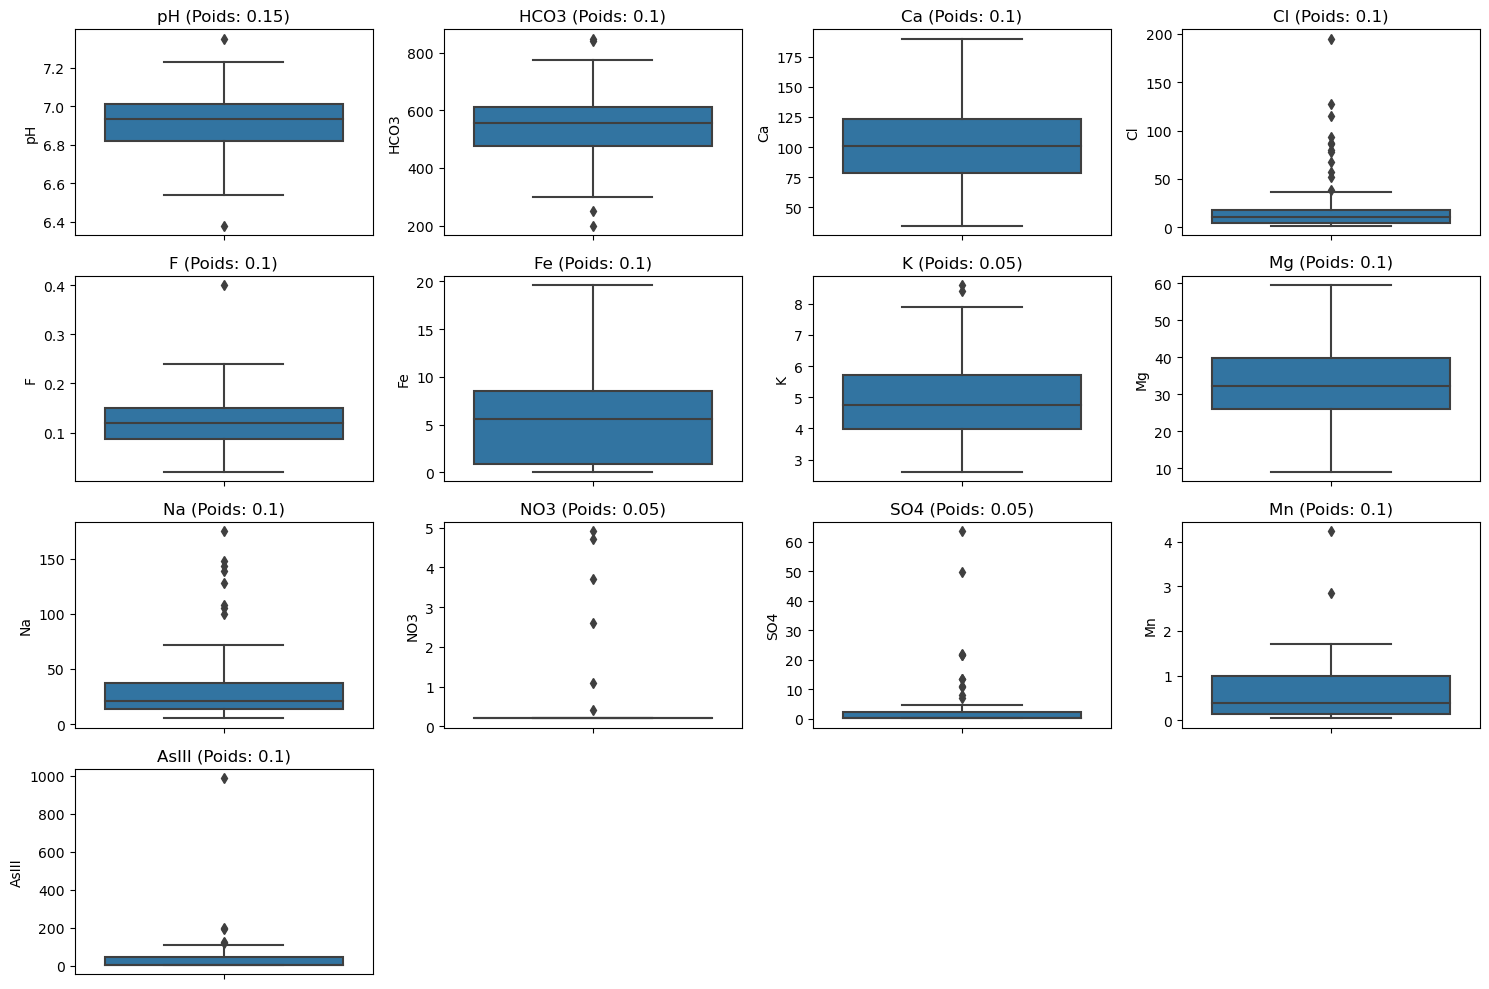

In [35]:
# Visualisation des sous-indices
plt.figure(figsize=(15, 10))
for i, (param, weight) in enumerate(weights.items(), 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=water_quality_df[param])
    plt.title(f'{param} (Poids: {weight})')
plt.tight_layout()
plt.show()

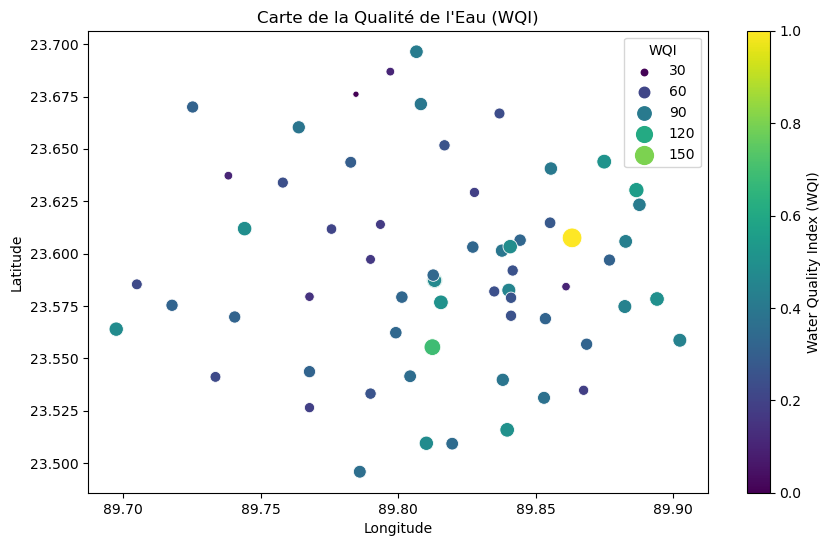

Premières lignes du DataFrame avec WQI :
   LAT_DEG  LONG_DEG                UNION  WELL_DEPTH  HCO3     Ca    Cl  \
0  23.6147   89.8553  Faridpur Paurashava        24.4   471  127.0  27.6   
1  23.6075   89.8633  Faridpur Paurashava        27.4   580  142.0   9.3   
2  23.6031   89.8272            Ambikapur        36.6   529  116.0  33.9   
3  23.6064   89.8444  Faridpur Paurashava        18.9   568  116.0  16.5   
4  23.5689   89.8536              Aliabad        45.7   561   88.4  13.5   

      F     Fe    K    Mg    Na  NO3    pH   SO4     Mn  AsIII       WQI  
0  0.20  0.447  4.5  27.8  22.5  0.2  6.84  13.5  1.470      7   70.4377  
1  0.40  4.240  3.9  29.6  25.0  0.2  7.17   0.2  1.130    990  179.4575  
2  0.20  9.600  3.9  32.5  19.0  0.2  6.99   8.2  1.130     27   78.4965  
3  0.10  0.944  6.2  30.6  30.9  0.2  6.82   3.9  0.999      4   78.3423  
4  0.24  7.680  5.0  40.0  36.6  4.7  6.82   0.5  0.080      4   76.6830  

Statistiques descriptives sur le WQI :
count     64

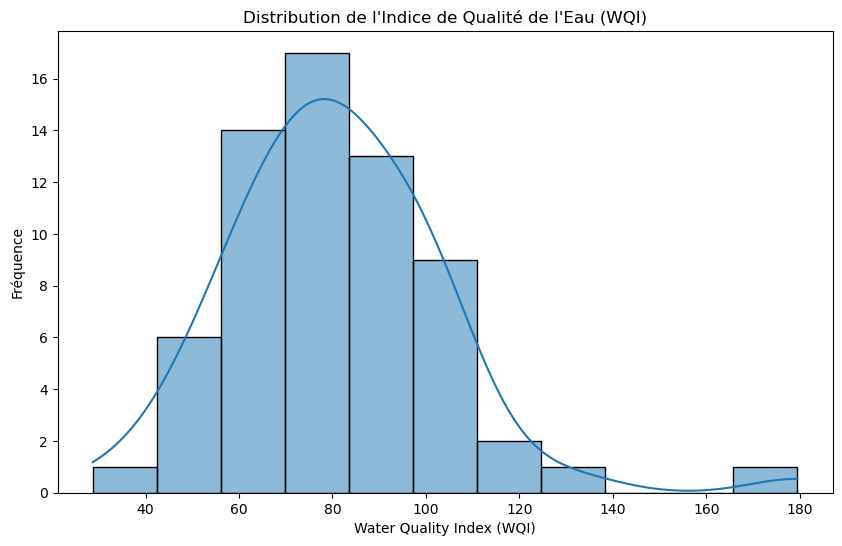

In [37]:
# Carte de la qualité de l'eau (WQI)
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=water_quality_df, x='LONG_DEG', y='LAT_DEG', size='WQI', hue='WQI', palette='viridis', sizes=(20, 200))
plt.title("Carte de la Qualité de l'Eau (WQI)")
plt.colorbar(scatter.collections[0], label='Water Quality Index (WQI)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Affichage des résultats du WQI
# Affichage des premières lignes du DataFrame avec WQI
print("Premières lignes du DataFrame avec WQI :")
print(water_quality_df.head())

# Statistiques descriptives sur le WQI
print("\nStatistiques descriptives sur le WQI :")
print(water_quality_df['WQI'].describe())

# Visualisation de la distribution du WQI
plt.figure(figsize=(10, 6))
sns.histplot(water_quality_df['WQI'], kde=True)
plt.title('Distribution de l\'Indice de Qualité de l\'Eau (WQI)')
plt.xlabel('Water Quality Index (WQI)')
plt.ylabel('Fréquence')
plt.show()

## Conclusion

Le calcul de l'indice de qualité de l'eau est terminé. Les résultats sont visualisés ci-dessus.